<a href="https://colab.research.google.com/github/ibedoor/machine-learning/blob/main/roc_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confusion Matrix

#### Dataset Options
1. Binary Classification Dataset of Your Choice
2. Seattle Rain Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv`
    - Note: target is `RAIN`
3. Titanic Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/titanic.csv`
3. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target is `Churn`
4. Iris dataset
    - `https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv`
    - Note: 3 possible classes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import*
from matplotlib import cm
cs = cm.Set2(np.arange(2)/2.)

1. Load in your dataset.

In [2]:
df = pd.read_csv('https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv')

In [3]:
df = pd.DataFrame(df)

2. Find out some information about the data...

In [4]:
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN
3708,1958-02-25,0.33,49,40,True
9235,1973-04-14,0.00,55,40,False
10808,1977-08-04,0.00,83,58,False
9427,1973-10-23,0.00,55,49,False
16884,1994-03-24,0.00,57,39,False


In [5]:
df.keys()

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

In [6]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


Cleaning Data

In [8]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [11]:
df['RAIN'] = df['RAIN'].astype(str)

In [12]:
df['RAIN'] = df['RAIN'].map({'False':0, 'True':1}).astype(int)

In [13]:
df['RAIN']

0        1
1        1
2        1
3        1
4        1
        ..
25546    0
25547    0
25548    0
25549    0
25550    0
Name: RAIN, Length: 25548, dtype: int64

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualizations (of your choice)

In [14]:
# correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.226736,-0.064365,0.515160
TMAX,-0.226736,1.000000,0.860675,-0.389241
TMIN,-0.064365,0.860675,1.000000,-0.139905
RAIN,0.515160,-0.389241,-0.139905,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


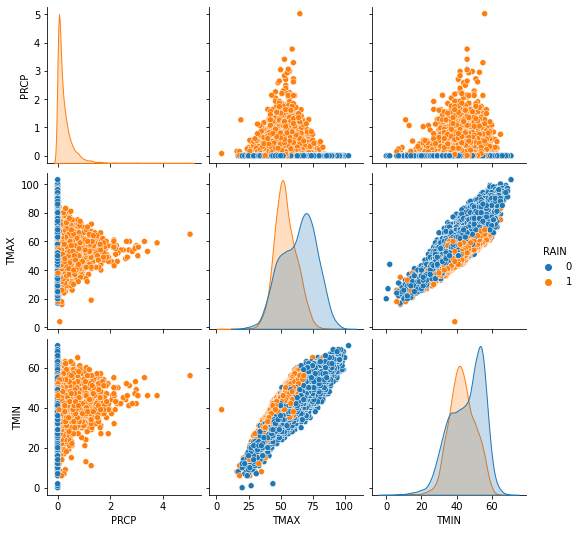

In [15]:
# pairplot 
sns.pairplot(df, hue='RAIN')

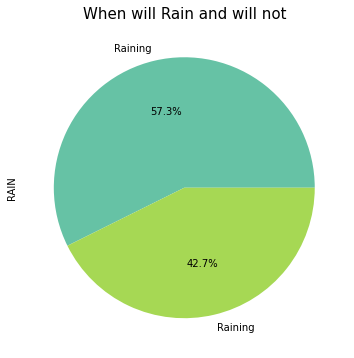

In [16]:
r = df.RAIN.value_counts()
rain_label = df['RAIN'].map({0: 'Not Raining', 1: 'Raining'})
plt.figure(figsize=(8,6))
r.plot.pie(autopct='%.1f%%', labels=rain_label, colors = cs).set_title('When will Rain and will not', fontsize=15);

4. Perform any data prep that needs to be done before splitting...

Note: may not be necessary, may require more cells

5. Split your data into training and testing datasets...

In [17]:
from sklearn.model_selection import train_test_split

X = df['PRCP']
y = df.RAIN

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

6. Import, create, and fit a LogisticRegression model with 1 variable

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(pd.DataFrame(X_train), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [21]:
preds = lr.predict(pd.DataFrame(X_test))

In [22]:
preds[:-5]

array([1, 1, 0, ..., 0, 0, 1])

In [23]:
# what do they look like? (show me some of the predictions)
preds[:-5]

array([1, 1, 0, ..., 0, 0, 1])

7. Score your model...
- accuracy_score

In [24]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, lr.predict(pd.DataFrame(X_test)))
print("Accuracy is {:.2f}%".format(acc*100))

Accuracy is 91.90%


8. Confustion Matrix

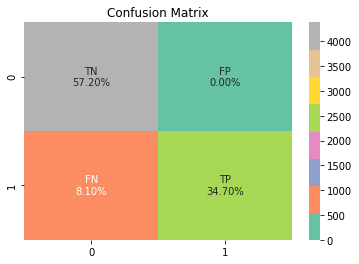

In [25]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, lr.predict(pd.DataFrame(X_test)))

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 10})
sns.heatmap(cf, annot=labels, fmt='', cmap='Set2').set_title("Confusion Matrix");

In [26]:
# confusion matrix by sklearn
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='Set3')

ValueError: ignored

9. Explain your confusion matrix...
- How many of each value (TP, FP, TN, FN) do you have?
- What does each mean?


  **TN: 57.25%**\
  **FP: 0.00%**\
  **FN: 8.10%**\
  **TP: 34.65%**

**TN** = predicted NOT RAIN , is NOT RAIN\
**FP** = predicted RAIN, is NOT RAIN\
**FN** = predicted NOT RAIN, is RAIN\
**TP** = predicted RAIN, is RAIN

10. Create, and fit a LogisticRegression model with **more than** 1 variable

In [ ]:
from sklearn.model_selection import train_test_split

vars = ['PRCP', 'TMAX', 'TMIN']  

X = df[vars]
y = df.RAIN

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
lr.fit(X_train, y_train)

11. Make predictions on your `X_test` values...

In [ ]:
preds= lr.predict(X_test)

In [ ]:
# what do they look like? (show me some of the predictions)
preds[:-5]

12. Score your model...
- accuracy_score


In [ ]:
acc = accuracy_score(y_test, lr.predict(pd.DataFrame(X_test)))
print("Accuracy is {:.2f}%".format(acc*100))

13.  Confustion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, lr.predict(pd.DataFrame(X_test)))

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 10})
sns.heatmap(cf, annot=labels, fmt='', cmap='Set2').set_title("Confusion Matrix");

In [ ]:
# confusion matrix by sklearn
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='Set3')

14.  Explain your confusion matrix...
- How many of each value do you have?
- What does each mean?

  **TN: 57.03%**\
  **FP: 0.26%**\
  **FN: 7.19%**\
  **TP: 35.53%**

**TN** = predicted NOT RAIN , is NOT RAIN\
**FP** = predicted RAIN, is NOT RAIN\
**FN** = predicted NOT RAIN, is RAIN\
**TP** = predicted RAIN, is RAIN

15. Which model is better? Why?

Actually, there is no significant difference between the two models, because we got 91.90% in the first and 92.55% in the second one.

## Bonus

16. Perform GridSearchCV with the better data

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
p_grid = {'fit_intercept': [True, False], 'max_iter': [100, 250, 1000, 10000]}

In [ ]:
grid = GridSearchCV(lr, p_grid)
grid

17. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [ ]:
p_grid = {'fit_intercept': [True], 'max_iter':[100]}

In [ ]:
grid = GridSearchCV(lr, cv=10, verbose=1, param_grid=p_grid)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

14. Accuracy Score and Confusion Matrix

In [ ]:
acc = accuracy_score(y_test, lr.predict(pd.DataFrame(X_test)))
print("Accuracy is {:.2f}%".format(acc*100))

In [ ]:
cf = confusion_matrix(y_test, lr.predict(pd.DataFrame(X_test)))

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6,4))
plt.rcParams.update({'font.size': 10})
sns.heatmap(cf, annot=labels, fmt='', cmap='Set3').set_title("Confusion Matrix");

In [ ]:
# confusion matrix by sklearn
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X=X_test, y_true=y_test, cmap='Set3')

Did the score change at all? Why?

Actually, there is no difference between the two models, because we got the same accuercy in both with 92.55% approximately.

### Bonus Bonus
Figure out ROC plot. Tell me about it.

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, preds)

In [ ]:
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
roc_auc = auc(fpr, tpr)
print('Area under thr ROC Curve: %f' % (roc_auc* 100))

By far this is the best threshold (0.0, 0.8) that we have got since it predicted no false positives( predicted RAIN, is NOT RAIN)


Just by glancing over the graph, we can conclude that threshold (0.0,0.8)  is better than the previous threshold and depending on how many False Positives that we are willing to accept, we can choose the optimal threshold.